In [20]:
# Initialize Otter
import otter
grader = otter.Notebook("lab02B.ipynb")

## Lab 02B: Pandas Overview II

To receive credit for a lab, answer all questions correctly and submit before the deadline.

**The on-time deadline is Tuesday, September 12, 11:59 PM. Please read the syllabus for the grace period policy. No late submissions beyond the grace period will be accepted.**

### Lab Walk-Through
In addition to the lab notebook, we have also released a prerecorded walk-through video of the lab. We encourage you to reference this video as you work through the lab. Run the cell below to display the videos.

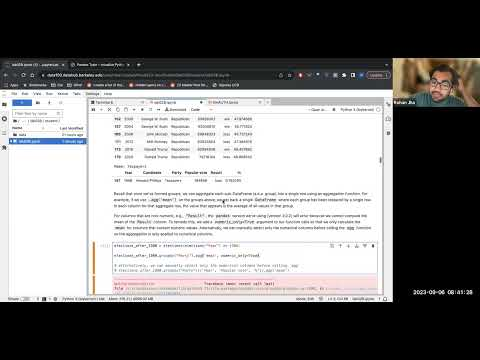

In [21]:
from IPython.display import YouTubeVideo
YouTubeVideo("hwRYs5ZRgW4", list = 'PLQCcNQgUcDfqSg049DVFZCQbupMY5Bn5Z', listType = 'playlist')

### Collaboration Policy

Data science is a collaborative activity. While you may talk with others about the labs, we ask that you **write your solutions individually**. If you do discuss the assignments with others, please **include their names** below. (That's a good way to learn your classmates' names.)

**Collaborators**: *list collaborators here*

---
[Pandas](https://pandas.pydata.org/) is one of the most widely used `Python` libraries in data science. In this lab, you will review commonly used data-wrangling operations/tools in `Pandas`. We continue the content from the previous lab and aim to give you familiarity with:

* Aggregating the data (using `.groupby`),
* Filtering the data (using boolean arrays and `groupby.filter`),
* Pivoting (using `.pivot_table`).

In this lab, you are going to use several `pandas` methods. Reminder from the lecture that you may press `shift+tab` on method parameters to see the documentation for that method. For example, if you were using the `drop` method in `pandas`, you could press `shift+tab` to see what `drop` is expecting.

`Pandas` is very similar to the `datascience` library that you saw in Data 8. This [conversion notebook](https://data100.datahub.berkeley.edu/hub/user-redirect/git-pull?repo=https%3A%2F%2Fgithub.com%2FDS-100%2Fsu23-materials&branch=main&urlpath=lab%2Ftree%2Fsu23-materials%2Flec%2Flec02%2Fdata8_translation_examples.ipynb) may serve as a useful guide!

This lab expects that you have watched all three `Pandas` lectures. If you have not, this lab will probably take a very long time.

In [22]:
import numpy as np
import pandas as pd
%matplotlib inline

<hr style="border: 5px solid #003262;" />
<hr style="border: 1px solid #fdb515;" />

### **REVIEW:** `Groupby` and `Groupby` Shorthand

Let's now turn to use `groupby` from lectures 3 and 4.

### Elections

Let's start by reading in the election dataset from the `pandas` lectures.

In [23]:
# Run this cell to load data from CSV file; no further action is needed.
elections = pd.read_csv("data/elections.csv")
elections.head(5)

,Year,Candidate,Party,Popular vote,Result,%
0,1824,Andrew Jackson,Democratic-Republican,151271,loss,57.210122
1,1824,John Quincy Adams,Democratic-Republican,113142,win,42.789878
2,1828,Andrew Jackson,Democratic,642806,win,56.203927
3,1828,John Quincy Adams,National Republican,500897,loss,43.796073
4,1832,Andrew Jackson,Democratic,702735,win,54.574789


As we saw before, we can `groupby` a specific column, e.g., `"Party"` and can print out the resulting sub-DataFrames. The output below can help you get an understanding of what `groupby` is actually doing.

An example is given below for elections since 1980.

In [24]:
# Run this cell to print sub-DataFrames of a groupby object; no further action is needed.
for n, g in elections[elections["Year"] >= 1980].groupby("Party"):
    print(f"Name: {n}") # By the way, this is an "f string", a relatively new and great feature of Python
    display(g)

Name: Citizens


,Year,Candidate,Party,Popular vote,Result,%
127,1980,Barry Commoner,Citizens,233052,loss,0.270182


Name: Constitution


,Year,Candidate,Party,Popular vote,Result,%
160,2004,Michael Peroutka,Constitution,143630,loss,0.117542
164,2008,Chuck Baldwin,Constitution,199750,loss,0.152398
172,2016,Darrell Castle,Constitution,203091,loss,0.149640


Name: Democratic


,Year,Candidate,Party,Popular vote,Result,%
129,1980,Jimmy Carter,Democratic,35480115,loss,41.132848
134,1984,Walter Mondale,Democratic,37577352,loss,40.729429
137,1988,Michael Dukakis,Democratic,41809074,loss,45.770691
140,1992,Bill Clinton,Democratic,44909806,win,43.118485
144,1996,Bill Clinton,Democratic,47400125,win,49.296938
151,2000,Al Gore,Democratic,50999897,loss,48.491813
158,2004,John Kerry,Democratic,59028444,loss,48.306775
162,2008,Barack Obama,Democratic,69498516,win,53.023510
168,2012,Barack Obama,Democratic,65915795,win,51.258484
176,2016,Hillary Clinton,Democratic,65853514,loss,48.521539


Name: Green


,Year,Candidate,Party,Popular vote,Result,%
149,1996,Ralph Nader,Green,685297,loss,0.712721
155,2000,Ralph Nader,Green,2882955,loss,2.741176
156,2004,David Cobb,Green,119859,loss,0.098088
165,2008,Cynthia McKinney,Green,161797,loss,0.123442
170,2012,Jill Stein,Green,469627,loss,0.365199
177,2016,Jill Stein,Green,1457226,loss,1.073699
181,2020,Howard Hawkins,Green,405035,loss,0.255731


Name: Independent


,Year,Candidate,Party,Popular vote,Result,%
130,1980,John B. Anderson,Independent,5719850,loss,6.631143
143,1992,Ross Perot,Independent,19743821,loss,18.956298
161,2004,Ralph Nader,Independent,465151,loss,0.380663
167,2008,Ralph Nader,Independent,739034,loss,0.563842
174,2016,Evan McMullin,Independent,732273,loss,0.539546


Name: Libertarian


,Year,Candidate,Party,Popular vote,Result,%
128,1980,Ed Clark,Libertarian,921128,loss,1.067883
132,1984,David Bergland,Libertarian,228111,loss,0.247245
138,1988,Ron Paul,Libertarian,431750,loss,0.472660
139,1992,Andre Marrou,Libertarian,290087,loss,0.278516
146,1996,Harry Browne,Libertarian,485759,loss,0.505198
153,2000,Harry Browne,Libertarian,384431,loss,0.365525
159,2004,Michael Badnarik,Libertarian,397265,loss,0.325108
163,2008,Bob Barr,Libertarian,523715,loss,0.399565
169,2012,Gary Johnson,Libertarian,1275971,loss,0.992241
175,2016,Gary Johnson,Libertarian,4489235,loss,3.307714


Name: Natural Law


,Year,Candidate,Party,Popular vote,Result,%
148,1996,John Hagelin,Natural Law,113670,loss,0.118219


Name: New Alliance


,Year,Candidate,Party,Popular vote,Result,%
136,1988,Lenora Fulani,New Alliance,217221,loss,0.237804


Name: Populist


,Year,Candidate,Party,Popular vote,Result,%
141,1992,Bo Gritz,Populist,106152,loss,0.101918


Name: Reform


,Year,Candidate,Party,Popular vote,Result,%
150,1996,Ross Perot,Reform,8085294,loss,8.408844
154,2000,Pat Buchanan,Reform,448895,loss,0.426819


Name: Republican


,Year,Candidate,Party,Popular vote,Result,%
131,1980,Ronald Reagan,Republican,43903230,win,50.897944
133,1984,Ronald Reagan,Republican,54455472,win,59.023326
135,1988,George H. W. Bush,Republican,48886597,win,53.518845
142,1992,George H. W. Bush,Republican,39104550,loss,37.544784
145,1996,Bob Dole,Republican,39197469,loss,40.766036
152,2000,George W. Bush,Republican,50456002,win,47.974666
157,2004,George W. Bush,Republican,62040610,win,50.771824
166,2008,John McCain,Republican,59948323,loss,45.737243
171,2012,Mitt Romney,Republican,60933504,loss,47.384076
173,2016,Donald Trump,Republican,62984828,win,46.407862


Name: Taxpayers


,Year,Candidate,Party,Popular vote,Result,%
147,1996,Howard Phillips,Taxpayers,184656,loss,0.192045


Recall that once we've formed groups, we can aggregate each sub-DataFrame (a.k.a. group) into a single row using an aggregation function. For example, if we use `.agg('mean')` on the groups above, we get back a single `DataFrame` where each group has been replaced by a single row. In each column for that aggregate row, the value that appears is the average of all values in that group.

For columns that are non-numeric, e.g., `"Result"`, the `pandas` version we're using (version 2.0.2) will error because we cannot compute the mean of the `Result` column. To remedy this, we add a `numeric_only=True` argument to our function calls so that we only calculate the `mean` for columns that contain numeric values. Alternatively, we can manually select only the numerical columns before calling the `agg` function so the aggregation is only applied to numerical columns.

In [25]:
elections_after_1980 = elections[elections["Year"] >= 1980]

elections_after_1980.groupby("Party").agg('mean', numeric_only=True)

# alternatively, we can manually select only the numerical columns before calling `agg`
# elections_after_1980.groupby("Party")[['Year', 'Popular vote', '%']].agg('mean')

,Year,Popular vote,%
Party,,,
Citizens,1980.000000,2.330520e+05,0.270182
Constitution,2009.333333,1.821570e+05,0.139860
Democratic,2000.000000,5.452196e+07,47.360184
Green,2008.000000,8.831137e+05,0.767151
Independent,2000.000000,5.480026e+06,5.414298
Libertarian,2000.000000,1.026652e+06,0.830876
Natural Law,1996.000000,1.136700e+05,0.118219
New Alliance,1988.000000,2.172210e+05,0.237804
Populist,1992.000000,1.061520e+05,0.101918


Equivalently we can use one of the shorthand aggregation functions, e.g. `.mean()`: 

In [26]:
elections_after_1980.groupby("Party").mean(numeric_only=True)

,Year,Popular vote,%
Party,,,
Citizens,1980.000000,2.330520e+05,0.270182
Constitution,2009.333333,1.821570e+05,0.139860
Democratic,2000.000000,5.452196e+07,47.360184
Green,2008.000000,8.831137e+05,0.767151
Independent,2000.000000,5.480026e+06,5.414298
Libertarian,2000.000000,1.026652e+06,0.830876
Natural Law,1996.000000,1.136700e+05,0.118219
New Alliance,1988.000000,2.172210e+05,0.237804
Populist,1992.000000,1.061520e+05,0.101918


Note that the index of the `DataFrame` returned by an `groupby.agg` call is no longer a set of numeric indices from $0$ to $N-1$. Instead, we see that the index for the example above is now the `Party`. If we want to restore our `DataFrame` so that `Party` is a column rather than the index, we can use `reset_index`.

In [27]:
elections_after_1980.groupby("Party").mean(numeric_only=True).reset_index()

,Party,Year,Popular vote,%
0,Citizens,1980.000000,2.330520e+05,0.270182
1,Constitution,2009.333333,1.821570e+05,0.139860
2,Democratic,2000.000000,5.452196e+07,47.360184
3,Green,2008.000000,8.831137e+05,0.767151
4,Independent,2000.000000,5.480026e+06,5.414298
5,Libertarian,2000.000000,1.026652e+06,0.830876
6,Natural Law,1996.000000,1.136700e+05,0.118219
7,New Alliance,1988.000000,2.172210e+05,0.237804
8,Populist,1992.000000,1.061520e+05,0.101918
9,Reform,1998.000000,4.267094e+06,4.417831


**IMPORTANT NOTE:** Notice that the code above consists of chained method calls. This sort of code is very common in `Pandas` programming and in data science in general. Such chained method calls can sometimes go many layers deep, so you might consider adding newlines between lines of code for clarity. For example, we could instead write the code above as:

In [28]:
# pandas method chaining
(
elections.query("Year >= 1980").groupby("Party") 
                               .mean(numeric_only=True)  ## Computes the mean values by party
                               .reset_index()            ## Resets to a numerical index
)

,Party,Year,Popular vote,%
0,Citizens,1980.000000,2.330520e+05,0.270182
1,Constitution,2009.333333,1.821570e+05,0.139860
2,Democratic,2000.000000,5.452196e+07,47.360184
3,Green,2008.000000,8.831137e+05,0.767151
4,Independent,2000.000000,5.480026e+06,5.414298
5,Libertarian,2000.000000,1.026652e+06,0.830876
6,Natural Law,1996.000000,1.136700e+05,0.118219
7,New Alliance,1988.000000,2.172210e+05,0.237804
8,Populist,1992.000000,1.061520e+05,0.101918
9,Reform,1998.000000,4.267094e+06,4.417831


Note that we have surrounded the entire call by a big set of parentheses so that `Python` doesn't complain about the indentation. An alternative is to use the \ symbol to indicate to `Python` that your code continues on to the next line!

In [29]:
# pandas method chaining (alternative)
elections[elections["Year"] >= 1980].groupby("Party") \
                               .mean(numeric_only=True) \
                               .reset_index()     

,Party,Year,Popular vote,%
0,Citizens,1980.000000,2.330520e+05,0.270182
1,Constitution,2009.333333,1.821570e+05,0.139860
2,Democratic,2000.000000,5.452196e+07,47.360184
3,Green,2008.000000,8.831137e+05,0.767151
4,Independent,2000.000000,5.480026e+06,5.414298
5,Libertarian,2000.000000,1.026652e+06,0.830876
6,Natural Law,1996.000000,1.136700e+05,0.118219
7,New Alliance,1988.000000,2.172210e+05,0.237804
8,Populist,1992.000000,1.061520e+05,0.101918
9,Reform,1998.000000,4.267094e+06,4.417831


**IMPORTANT NOTE:** You should NEVER solve problems like the one above using loops or list comprehensions. This is slow and also misses the entire point of this part of Data 100. 

Before we continue, we'll print out the election dataset again for your convenience. 

In [30]:
elections.head(5)

,Year,Candidate,Party,Popular vote,Result,%
0,1824,Andrew Jackson,Democratic-Republican,151271,loss,57.210122
1,1824,John Quincy Adams,Democratic-Republican,113142,win,42.789878
2,1828,Andrew Jackson,Democratic,642806,win,56.203927
3,1828,John Quincy Adams,National Republican,500897,loss,43.796073
4,1832,Andrew Jackson,Democratic,702735,win,54.574789


---
### Question 1a
Using `groupby.agg` or one of the shorthand methods (`groupby.min`, `groupby.first`, etc.), create a `Series` object `best_result_percentage_only` that returns a `Series` showing the entire best result for every party, sorted in decreasing order. Your `Series` should include only parties that have earned at least 10% of the vote in some election. Your result should look like this:

<code>
Party
Democratic               61.344703
Republican               60.907806
Democratic-Republican    57.210122
National Union           54.951512
Whig                     53.051213
Liberal Republican       44.071406
National Republican      43.796073
Northern Democratic      29.522311
Progressive              27.457433
American                 21.554001
Independent              18.956298
Southern Democratic      18.138998
American Independent     13.571218
Constitutional Union     12.639283
Free Soil                10.138474
Name: %, dtype: float64
</code>
<br/>

A list of named `groupby.agg` shorthand methods are [here](https://pandas.pydata.org/pandas-docs/stable/user_guide/groupby.html#aggregation) (you'll have to scroll down about one page).


In [31]:
at_least_10 = elections[elections["%"] >= 10] 
best_result = at_least_10.groupby("Party").max("%")
best_result_percentage_only = best_result.sort_values(by = ['%'], ascending = False)["%"]
best_result_percentage_only

Party
Democratic               61.344703
Republican               60.907806
Democratic-Republican    57.210122
National Union           54.951512
Whig                     53.051213
Liberal Republican       44.071406
National Republican      43.796073
Northern Democratic      29.522311
Progressive              27.457433
American                 21.554001
Independent              18.956298
Southern Democratic      18.138998
American Independent     13.571218
Constitutional Union     12.639283
Free Soil                10.138474
Name: %, dtype: float64

In [32]:
grader.check("q1a")

q1a results: All test cases passed!

---
### Question 1b  
Repeat Question 1a. However, this time, your result should be a `DataFrame` showing all available information (all columns) rather than only the percentage as a `Series`.

This question is trickier than Question 1a. Make sure to check the lecture slides if you're stuck! It's very easy to make a subtle mistake that shows Woodrow Wilson and Howard Taft both winning the 2020 election.

For example, the first 3 rows of your table should be:

|Party | Year | Candidate      | Popular Vote | Result | %         |
|------|------|----------------|--------------|--------|-----------|
|**Democratic**  | 1964 | Lyndon Johnson | 43127041      | win   | 61.344703 |
|**Republican**  | 1972 | Richard Nixon | 47168710      | win   | 60.907806 |
|**Democratic-Republican**  | 1824 | Andrew Jackson | 151271      | loss   | 57.210122 |

Note that the index is `Party`. In other words, don't use `reset_index`.


In [33]:
best_result = elections[elections["%"] >= 10].sort_values("%").groupby("Party").last().sort_values("%", ascending = False)
best_result

,Year,Candidate,Popular vote,Result,%
Party,,,,,
Democratic,1964,Lyndon Johnson,43127041,win,61.344703
Republican,1972,Richard Nixon,47168710,win,60.907806
Democratic-Republican,1824,Andrew Jackson,151271,loss,57.210122
National Union,1864,Abraham Lincoln,2211317,win,54.951512
Whig,1840,William Henry Harrison,1275583,win,53.051213
Liberal Republican,1872,Horace Greeley,2834761,loss,44.071406
National Republican,1828,John Quincy Adams,500897,loss,43.796073
Northern Democratic,1860,Stephen A. Douglas,1380202,loss,29.522311
Progressive,1912,Theodore Roosevelt,4122721,loss,27.457433


In [34]:
grader.check("q1b")

q1b results: All test cases passed!

### **REVIEW:** `DataFrameGroupBy.filter`

Our `DataFrame` contains a number of parties that have never had a successful presidential run. For example, the 2020 elections included candidates from the Libertarian and Green parties, neither of which have elected a president.

In [35]:
# Run this cell to print the last four rows; no further action is needed.
elections.tail(4)

,Year,Candidate,Party,Popular vote,Result,%
178,2020,Joseph Biden,Democratic,81268924,win,51.311515
179,2020,Donald Trump,Republican,74216154,loss,46.858542
180,2020,Jo Jorgensen,Libertarian,1865724,loss,1.177979
181,2020,Howard Hawkins,Green,405035,loss,0.255731


Suppose we were conducting an analysis trying to focus our attention on parties that had elected a president. 

The most natural approach is to use `groupby.filter` [(docs)](https://pandas.pydata.org/docs/reference/api/pandas.core.groupby.DataFrameGroupBy.filter.html). This is an incredibly powerful but subtle tool for filtering data.

The code below accomplishes the task at hand. It does this by creating a function that returns `True` if and only if a sub-`DataFrame` (a.k.a. group) contains at least one winner. This function, in turn, uses the `pandas` function `any` [(docs)](https://pandas.pydata.org/docs/reference/api/pandas.Series.any.html).

In [36]:
# Run this cell to keep only the rows of parties that have 
# elected a president; no further action is needed.
def at_least_one_candidate_in_the_frame_has_won(frame):
    """Returns df with rows only kept for parties that have
    won at least one election
    """
    return (frame["Result"] == 'win').any()

winners_only = (
    elections
        .groupby("Party")
        .filter(at_least_one_candidate_in_the_frame_has_won)
)
winners_only.tail(5)

,Year,Candidate,Party,Popular vote,Result,%
171,2012,Mitt Romney,Republican,60933504,loss,47.384076
173,2016,Donald Trump,Republican,62984828,win,46.407862
176,2016,Hillary Clinton,Democratic,65853514,loss,48.521539
178,2020,Joseph Biden,Democratic,81268924,win,51.311515
179,2020,Donald Trump,Republican,74216154,loss,46.858542


Alternately, we could have used a `lambda` function instead of explicitly defining a named function using `def`. 

In [37]:
# Run this cell to keep only the rows of parties that have 
# elected a president; no further action is needed.
winners_only = (
    elections
        .groupby("Party")
        .filter(lambda x : (x["Result"] == "win").any())
)
winners_only.tail(5)

,Year,Candidate,Party,Popular vote,Result,%
171,2012,Mitt Romney,Republican,60933504,loss,47.384076
173,2016,Donald Trump,Republican,62984828,win,46.407862
176,2016,Hillary Clinton,Democratic,65853514,loss,48.521539
178,2020,Joseph Biden,Democratic,81268924,win,51.311515
179,2020,Donald Trump,Republican,74216154,loss,46.858542


---
### Question 1c

Using `filter`, create a `DataFrame` object `major_party_results_since_1988` that includes all election results starting after 1988 (exclusive) but only shows a row if the Party it belongs to has earned at least 1% of the popular vote in ANY election since 1988.

For example, in 1988, you should not include the `New Alliance` candidate since this party has not earned 1% of the vote since 1988. However, you should include the `Libertarian` candidate from 1988 despite only having 0.47 percent of the vote in 1988, because in 2016 and 2020, the Libertarian candidates Gary Johnson and Jo Jorgensen exceeded 1% of the vote.

For example, the first three rows of the table you generate should look like:

|     |   Year | Candidate         | Party       |   Popular vote | Result   |         % |
|----:|-------:|:------------------|:------------|---------------:|:---------|----------:|
| 139 |   1992 | Andre Marrou      | Libertarian |       290087   | loss     | 0.278516  |
| 140 |   1992 | Bill Clinton      | Democratic  |       44909806 | win      | 43.118485 |
| 142 |   1992 | George H. W. Bush | Republican  |       39104550 | loss     |  37.544784|

*Hint*: The following questions might help you construct your solution. One of the lines should be identical to the `filter` examples shown above.

1) How can we **only** keep rows in the data starting after 1988 (exclusive)?
2) What column should we `groupby` to filter out parties that have earned at least 1% of the popular vote in ANY election since 1988?
3) How can we write an aggregation function that takes a sub-DataFrame and returns whether at least 1% of the vote has been earned in that sub-DataFrame? This may give you a hint about the second question!


In [83]:
#Using filter, create a DataFrame object major_party_results_since_1988 
#that includes all election results starting after 1988 
#(exclusive) but only shows a row if the Party it belongs to has 
#earned at least 1% of the popular vote in ANY election since 1988.
task1 = elections[elections["Year"] > 1988]
major_party_results_since_1988 = task1.groupby("Party").filter(lambda x: x["%"].max() >=1)
major_party_results_since_1988.head()

,Year,Candidate,Party,Popular vote,Result,%
139,1992,Andre Marrou,Libertarian,290087,loss,0.278516
140,1992,Bill Clinton,Democratic,44909806,win,43.118485
142,1992,George H. W. Bush,Republican,39104550,loss,37.544784
143,1992,Ross Perot,Independent,19743821,loss,18.956298
144,1996,Bill Clinton,Democratic,47400125,win,49.296938


In [51]:
grader.check("q1c")

q1c results: All test cases passed!

### **REVIEW:** `str`

`Pandas` provides special purpose functions for working with specific common data types such as strings and dates, which you will learn about in more detail in Lecture 6. For example, the code below provides the length of every Candidate's name from our `elections` dataset. 

In [52]:
elections["Candidate"].str.len()

0      14
1      17
2      14
3      17
4      14
       ..
177    10
178    12
179    12
180    12
181    14
Name: Candidate, Length: 182, dtype: int64

---
### Question 2

Using `.str.split`, create a new `DataFrame` called `elections_with_first_name` with a new column `First Name` that is equal to the Candidate's first name.

See the `Pandas` `str` [documentation](https://pandas.pydata.org/docs/reference/api/pandas.Series.str.split.html) for documentation on using `str.split`.

In [70]:
elections_with_first_name = elections.copy()
elections_with_first_name["First Name"] = elections_with_first_name["Candidate"].str.split().str[0]
elections_with_first_name

,Year,Candidate,Party,Popular vote,Result,%,First Name
0,1824,Andrew Jackson,Democratic-Republican,151271,loss,57.210122,Andrew
1,1824,John Quincy Adams,Democratic-Republican,113142,win,42.789878,John
2,1828,Andrew Jackson,Democratic,642806,win,56.203927,Andrew
3,1828,John Quincy Adams,National Republican,500897,loss,43.796073,John
4,1832,Andrew Jackson,Democratic,702735,win,54.574789,Andrew
...,...,...,...,...,...,...,...
177,2016,Jill Stein,Green,1457226,loss,1.073699,Jill
178,2020,Joseph Biden,Democratic,81268924,win,51.311515,Joseph
179,2020,Donald Trump,Republican,74216154,loss,46.858542,Donald
180,2020,Jo Jorgensen,Libertarian,1865724,loss,1.177979,Jo


In [71]:
grader.check("q2")

q2 results: All test cases passed!

---
## Babynames
Remember the `babynames` dataset from Lab02A? Let's load it in again and explore the data with our newly covered functions! To keep things consistent with lecture, we'll only load in data from California. 

Run the following cell: 

In [72]:
import urllib.request
import os.path
import zipfile

data_url = "https://www.ssa.gov/oact/babynames/state/namesbystate.zip"
local_filename = "data/babynamesbystate.zip"
if not os.path.exists(local_filename): # If the data exists don't download again
    with urllib.request.urlopen(data_url) as resp, open(local_filename, 'wb') as f:
        f.write(resp.read())

zf = zipfile.ZipFile(local_filename, 'r')

ca_name = 'STATE.CA.TXT'
field_names = ['State', 'Sex', 'Year', 'Name', 'Count']
with zf.open(ca_name) as fh:
    babynames = pd.read_csv(fh, header=None, names=field_names)

babynames.head()

,State,Sex,Year,Name,Count
0,CA,F,1910,Mary,295
1,CA,F,1910,Helen,239
2,CA,F,1910,Dorothy,220
3,CA,F,1910,Margaret,163
4,CA,F,1910,Frances,134


The code below creates a table with the frequency of all names from 2022. 

In [73]:
# Run this cell to create a table with the frequency 
# of all names from 2022; no further action is needed.
babynames_2022 = (
    babynames[babynames['Year'] == 2022]
              .groupby("Name")
              .sum()[["Count"]]
              .reset_index()
)
babynames_2022

,Name,Count
0,Aadhini,6
1,Aadhira,5
2,Aadhya,33
3,Aadi,11
4,Aadit,5
...,...,...
6196,Zyla,20
6197,Zylah,14
6198,Zylo,5
6199,Zyon,17


---
### Question 3

Using the `pd.merge` function described in the lecture, combine the `babynames_2022` table with the `elections_with_first_name` table you created earlier to form `presidential_candidates_and_name_popularity`.


In [76]:
presidential_candidates_and_name_popularity = babynames_2022.merge(right = elections_with_first_name, left_on = "Name", right_on = "First Name")
presidential_candidates_and_name_popularity

,Name,Count,Year,Candidate,Party,Popular vote,Result,%,First Name
0,Aaron,903,1920,Aaron S. Watkins,Prohibition,188787,loss,0.708351,Aaron
1,Abraham,353,1860,Abraham Lincoln,Republican,1855993,win,39.699408,Abraham
2,Abraham,353,1864,Abraham Lincoln,National Union,2211317,win,54.951512,Abraham
3,Allan,38,1916,Allan L. Benson,Socialist,590524,loss,3.194193,Allan
4,Andre,242,1992,Andre Marrou,Libertarian,290087,loss,0.278516,Andre
...,...,...,...,...,...,...,...,...,...
139,William,831,1932,William Z. Foster,Communist,103307,loss,0.261069,William
140,William,831,1936,William Lemke,Union,892378,loss,1.960733,William
141,Woodrow,6,1912,Woodrow Wilson,Democratic,6296284,win,41.933422,Woodrow
142,Woodrow,6,1916,Woodrow Wilson,Democratic,9126868,win,49.367987,Woodrow


In [77]:
grader.check("q3")

q3 results: All test cases passed!

### **REVIEW:** `pandas.pivot_table`

Suppose we want to build a table showing the total number of babies born of each sex in each year. One way is to `groupby` using both columns of interest:

In [80]:
babynames.groupby(["Year", "Sex"])[["Count"]].agg(sum).head(6)

Count
Year Sex       
1910 F     5950
     M     3213
1911 F     6602
     M     3381
1912 F     9804
     M     8142

While this does give us the information we're looking for, a more natural approach is to use pivot tables to represent our data in a more readable format.

In [81]:
babynames_pivot = babynames.pivot_table(
    index = "Year",     # rows (turned into index)
    columns = "Sex",    # column values
    values = ["Count"], # field(s) to process in each group
    aggfunc = np.sum,   # group operation
)
babynames_pivot.head(6)

Count       
Sex       F      M
Year              
1910   5950   3213
1911   6602   3381
1912   9804   8142
1913  11860  10234
1914  13815  13111
1915  18643  17192

We can also include multiple values in our pivot tables 

In [82]:
babynames_pivot = babynames.pivot_table(
    index = "Year",     # rows (turned into index)
    columns = "Sex",    # column values
    values = ["Count", "Name"],
    aggfunc = np.max,   # group operation
)
babynames_pivot.head(6)

Count          Name         
Sex      F     M       F        M
Year                             
1910   295   237  Yvonne  William
1911   390   214   Zelma   Willis
1912   534   501  Yvonne  Woodrow
1913   584   614   Zelma   Yoshio
1914   773   769   Zelma   Yoshio
1915   998  1033    Zita    Yukio

---
### Question 4

Using `presidential_candidates_and_name_popularity`, create a table, `party_result_popular_vote_pivot`, whose index is the `Party` and whose columns are their `Result`. Each cell should contain the total number of popular votes received. `pandas`' `pivot_table` documentation is [here](https://pandas.pydata.org/docs/reference/api/pandas.pivot_table.html).

You may notice that there are `NaN`s in your table from missing data. Replace the `NaN` values with 0. You may find `.pivot_table`'s `fill_value=` argument helpful. Or, you can use `pd.DataFrame.fillna` [(documentation here)](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.fillna.html).

In [91]:
party_result_popular_vote_pivot = presidential_candidates_and_name_popularity.pivot_table(
    index = "Party",
    columns = "Result",
    values = ["Popular vote"],
    aggfunc = np.sum,
    fill_value = 0
)
party_result_popular_vote_pivot

Popular vote           
Result                        loss        win
Party                                        
American                    158271          0
American Independent      11172260          0
Anti-Masonic                100715          0
Anti-Monopoly               134294          0
Citizens                    233052          0
Communist                   103307          0
Constitution                346721          0
Constitutional Union        590901          0
Democratic               314190254  441751531
Democratic-Republican       151271     113142
Free Soil                   446711          0
Green                      4254943          0
Greenback                   308649          0
Independent               28140589          0
Libertarian                7723416          0
National Democratic         134645          0
National Republican         985102          0
National Union                   0    2211317
Natural Law                 113670          0
New Alliance                217221          0
Northern Democratic        1380202          0
Populist                   1261250          0
Progressive               10252501          0
Prohibition                2141790          0
Reform                     8085294          0
Republican               341121121  481561200
Socialist                  4825871          0
Southern Democratic         848019          0
Taxpayers                   184656          0
Union                       892378          0
Whig                       1996929    2635818

In [93]:
grader.check("q4")

q4 results: All test cases passed!

Just for fun: Which historical presidential candidates have names that were the least and most popular in 2022? Note: Here you'll observe a common problem in data science -- one of the least popular names is actually due to the fact that one recent president was so commonly known by his nickname that he appears named as such in the database from which you pulled election results.

In [ ]:
# your optional code here
...

<hr style="border: 5px solid #003262;" />
<hr style="border: 1px solid #fdb515;" />

## Congratulations! You have finished Lab 02B!

## Submission

Make sure you have run all cells in your notebook in order before running the cell below, so that all images/graphs appear in the output. The cell below will generate a zip file for you to submit. **Please save before exporting!**

In [ ]:
# Save your notebook first, then run this cell to export your submission.
grader.export(pdf=False, run_tests=True)